In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
data_dir = 'E:/Jupyter NB/10 class Classification/'

train_dir = 'E:/Jupyter NB/10 class Classification/Train_val_test/train'
val_dir = 'E:/Jupyter NB/10 class Classification/Train_val_test/val'

# Defining Model

In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras import layers
from keras import models

from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.layers import Lambda, concatenate, Activation
from keras.losses import categorical_crossentropy as logloss
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from keras import backend as K

from keras.applications.mobilenet import preprocess_input
from mobilenet import get_mobilenet
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [4]:
'''
def preprocess_input(x):
    x /= 255.0
    x -= 0.5
    x *= 2.0
    return x
'''

'\ndef preprocess_input(x):\n    x /= 255.0\n    x -= 0.5\n    x *= 2.0\n    return x\n'

In [5]:
'''
std_model = models.Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(20, activation = 'softmax')
    
])
'''

std_model = get_mobilenet(224, alpha=0.25, weight_decay=1e-5, dropout=0.1)

std_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 8)       216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 8)       32        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 8)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)       72        
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 8)       32  

# Model

In [6]:
data_generator = ImageDataGenerator(data_format='channels_last', preprocessing_function = preprocess_input)
#val_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    shuffle=False)

validation_generator = data_generator.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    shuffle=False)

Found 2000 images belonging to 20 classes.
Found 400 images belonging to 20 classes.


In [7]:
std_model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.SGD(lr=5e-3, momentum=0.9, nesterov=True),
    metrics=['accuracy', 'top_k_categorical_accuracy', ])

In [8]:
std_model.fit_generator(
    train_generator,
    steps_per_epoch=32,
    epochs=400,
    callbacks=[
        ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_delta=0.007),
        EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)
    ],
    validation_data=validation_generator,
    validation_steps=7,
    workers=4)

Epoch 1/400
32/32 [==============================] - 11s 328ms/step - loss: 4.7405 - accuracy: 0.0285 - top_k_categorical_accuracy: 0.1860 - val_loss: 4.3429 - val_accuracy: 0.0925 - val_top_k_categorical_accuracy: 0.2850
Epoch 2/400
32/32 [==============================] - 6s 174ms/step - loss: 4.8354 - accuracy: 0.0410 - top_k_categorical_accuracy: 0.2205 - val_loss: 4.8822 - val_accuracy: 0.1050 - val_top_k_categorical_accuracy: 0.3950
Epoch 3/400
32/32 [==============================] - 6s 174ms/step - loss: 5.0450 - accuracy: 0.0445 - top_k_categorical_accuracy: 0.2050 - val_loss: 0.1389 - val_accuracy: 0.1300 - val_top_k_categorical_accuracy: 0.5350
Epoch 4/400
32/32 [==============================] - 6s 176ms/step - loss: 4.6650 - accuracy: 0.0775 - top_k_categorical_accuracy: 0.2500 - val_loss: 1.2608 - val_accuracy: 0.1950 - val_top_k_categorical_accuracy: 0.5250
Epoch 5/400
32/32 [==============================] - 6s 177ms/step - loss: 4.4913 - accuracy: 0.0430 - top_k_catego

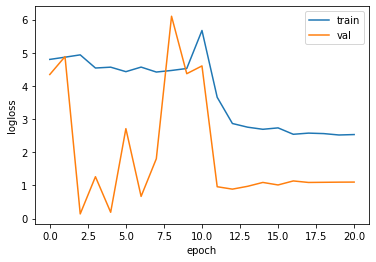

In [9]:
plt.plot(std_model.history.history['loss'], label='train');
plt.plot(std_model.history.history['val_loss'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('logloss');
plt.savefig('loss');

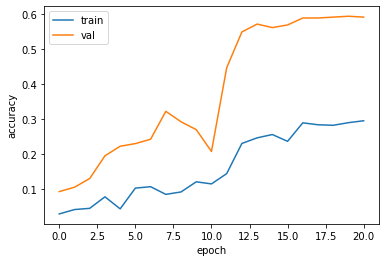

In [10]:
plt.plot(std_model.history.history['accuracy'], label='train');
plt.plot(std_model.history.history['val_accuracy'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');
plt.savefig('acc');

In [11]:
plt.plot(std_model.history.history['categorical_crossentropy'], label='train');
plt.plot(std_model.history.history['val_categorical_crossentropy'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('logloss');
plt.savefig('logloss');

KeyError: 'categorical_crossentropy'